# **Importing Library**




In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/datatrained/Flight_pred/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test_df=pd.read_excel('/content/drive/MyDrive/datatrained/Flight_pred/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# ***EDA***

## preprocessing

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


## **checking null value**

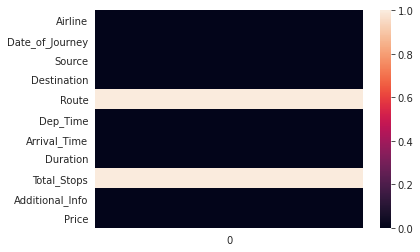

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**We observe 2 missing values,I can directly drop these,as these are very less.**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64



---



---





Testing data

In [ ]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

##**Changing Data type**

In [ ]:
import datetime as dt

In [ ]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [ ]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time']).dt.hour

In [ ]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time']).dt.hour



---


In arrival and departure time minute dosent matter 


---



---



**Test dataset**

In [ ]:
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])

In [ ]:
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

In [ ]:
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time']).dt.hour

## Data filtering:-

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22,1,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18,23,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16,21,4h 45m,1 stop,No info,13302


In [ ]:
# function to seprate place
def sep_place(df,feature,sep):
  temp=pd.DataFrame()
  for i in df[feature]:
    temp=pd.concat([temp,pd.DataFrame(str(i).split(sep)).T],axis=0,ignore_index=True)

  return(temp)


In [ ]:
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]
df.fillna('None',inplace=True)

In [ ]:
test_df['Route1']=test_df['Route'].str.split('→').str[0]
test_df['Route2']=test_df['Route'].str.split('→').str[1]
test_df['Route3']=test_df['Route'].str.split('→').str[2]
test_df['Route4']=test_df['Route'].str.split('→').str[3]
test_df['Route5']=test_df['Route'].str.split('→').str[4]
test_df.fillna('None',inplace=True)

In [ ]:
df.drop('Route',axis=1,inplace=True)
test_df.drop('Route',axis=1,inplace=True)

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
df['Total_Stops']=df['Total_Stops'].str.split(' ').str[0].map({'non-stop':0,'1':1,'2':2,'3':3,'4':4,'5':5})
test_df['Total_Stops']=test_df['Total_Stops'].str.split(' ').str[0].map({'non-stop':0,'1':1,'2':2,'3':3,'4':4,'5':5})

## Analysing feature

In [ ]:
df.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Dep_Time             24
Arrival_Time         24
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Route1                5
Route2               45
Route3               30
Route4               14
Route5                6
dtype: int64



---


## **Visualization and feature eng**


---



---



(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <a list of 10 Patch objects>)

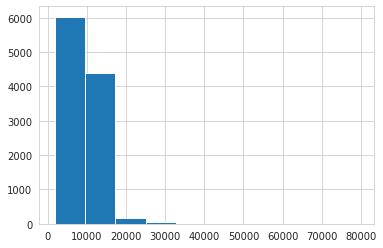

In [ ]:
plt.hist(df['Price'])

In [ ]:
df['ln_price']=np.log(df['Price']) #normalizing the price

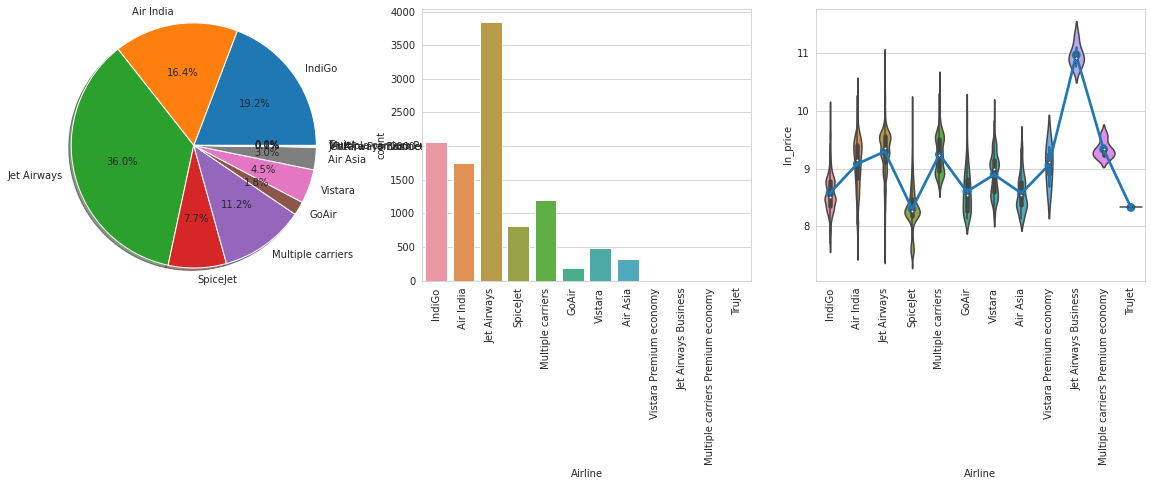

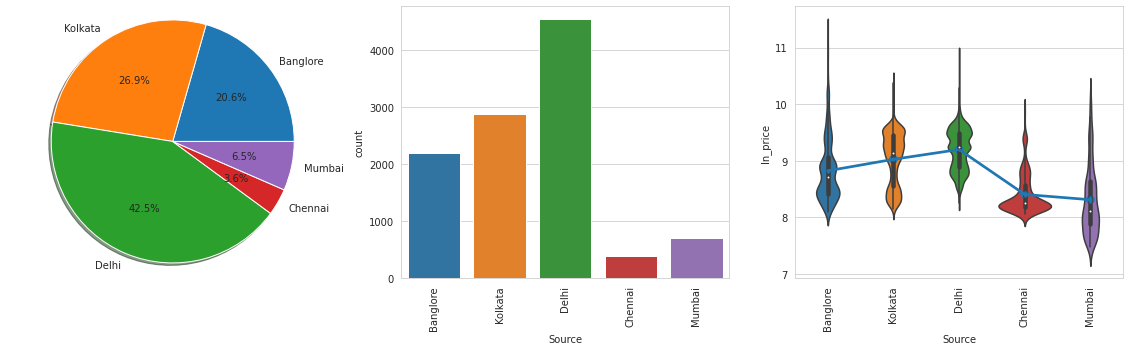

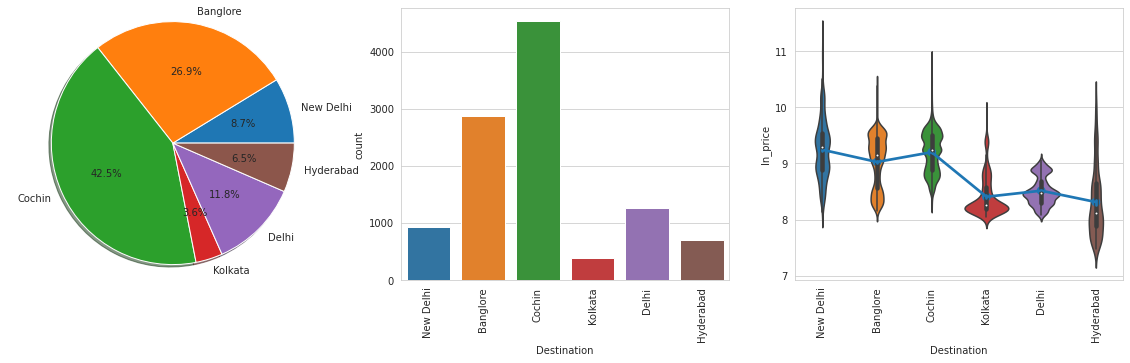

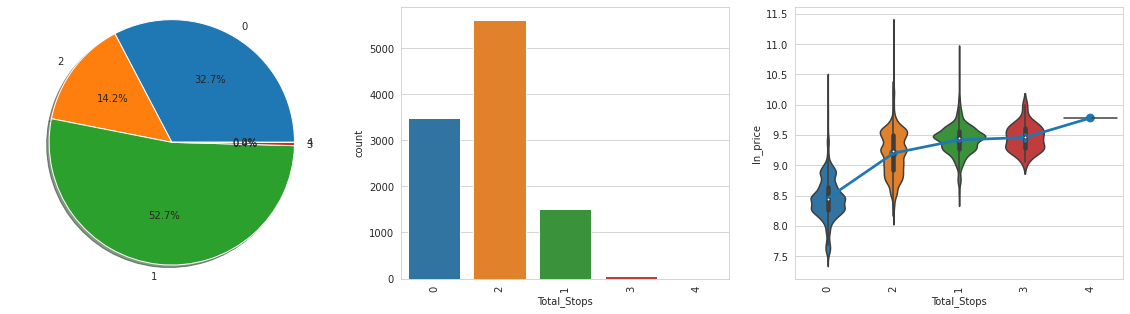

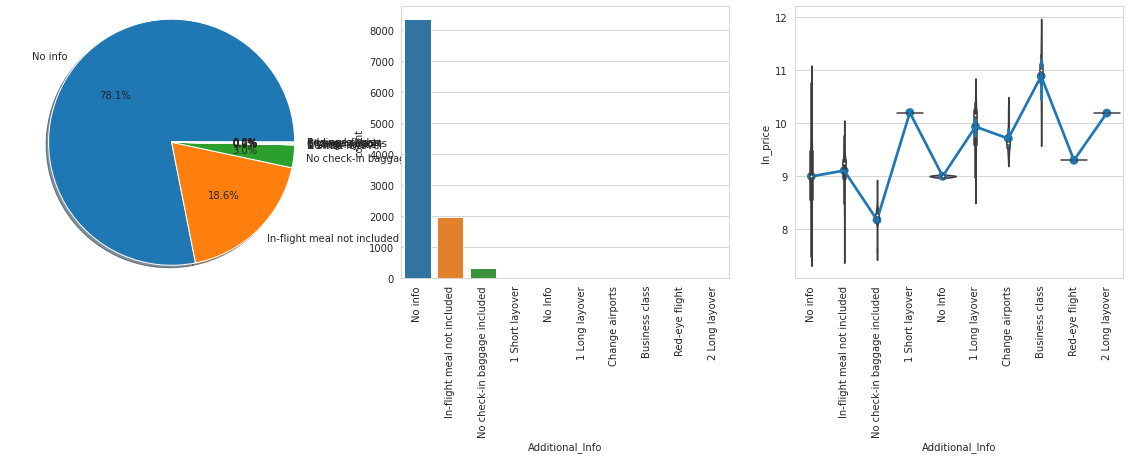

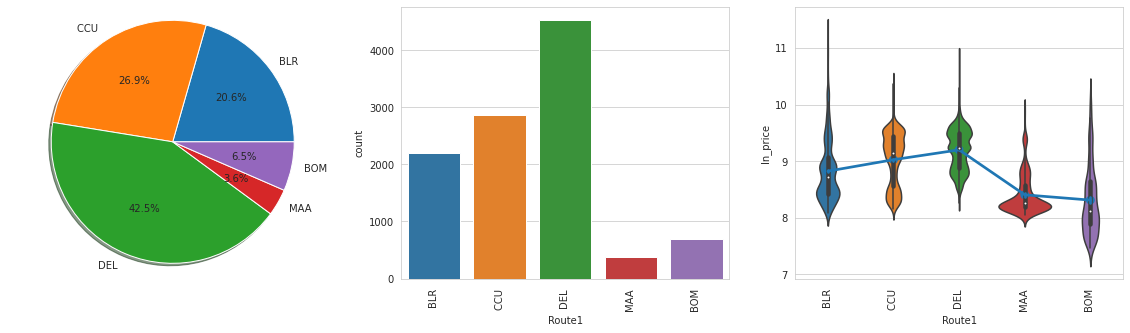

In [ ]:
for i in ['Airline','Source','Destination','Total_Stops','Additional_Info','Route1']:
  labels=df[i].unique().tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2)
  ax2.set_xticklabels(labels=labels,rotation=90)
  sns.violinplot(x=i,y='ln_price',data=df,ax=ax3)
  sns.pointplot(x=i,y='ln_price',data=df,ax=ax3)
  ax3.set_xticklabels(labels=labels,rotation=90)
  plt.show()


Flight, Source, Destination, total stop, Additional information has very high variance it is appropriate to  encode it using nominal encoding

Route should be ordinary in  encoded


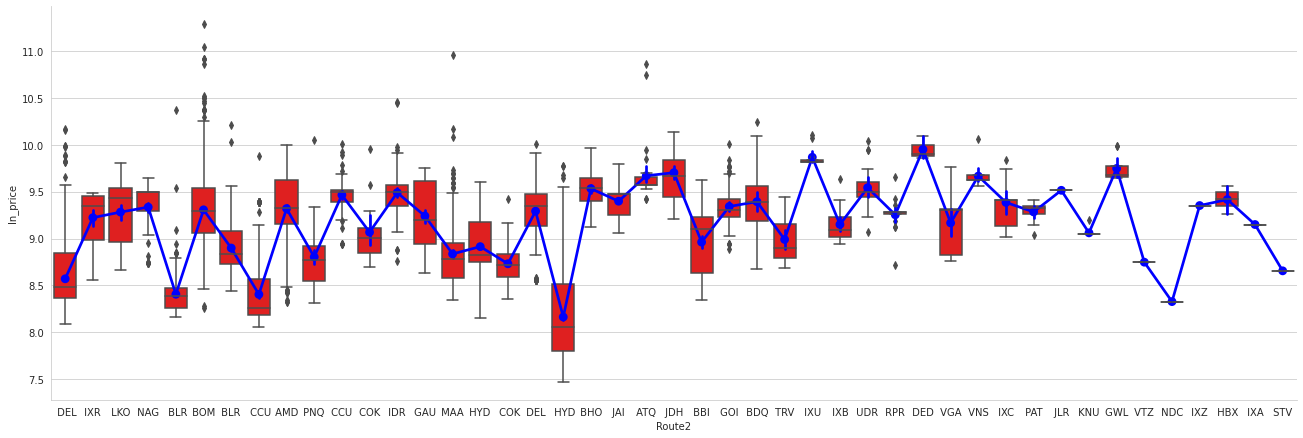

In [ ]:
sns.catplot(x='Route2',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='r')
sns.pointplot(x='Route2',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='b')
plt.show()

Route2 has a very high variance

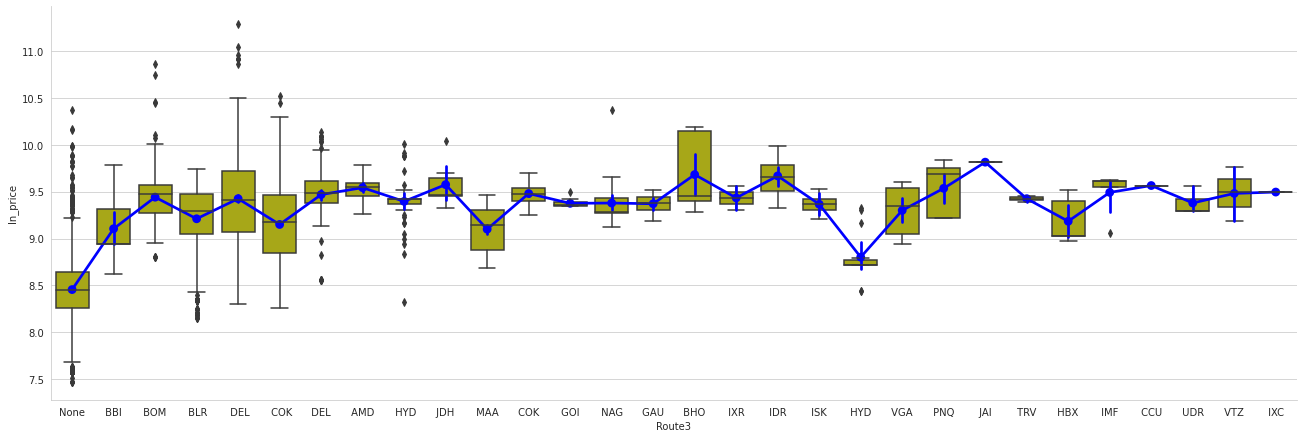

In [ ]:
sns.catplot(x='Route3',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='y')
sns.pointplot(x='Route3',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='b')
plt.show()

Route3 have a small variance

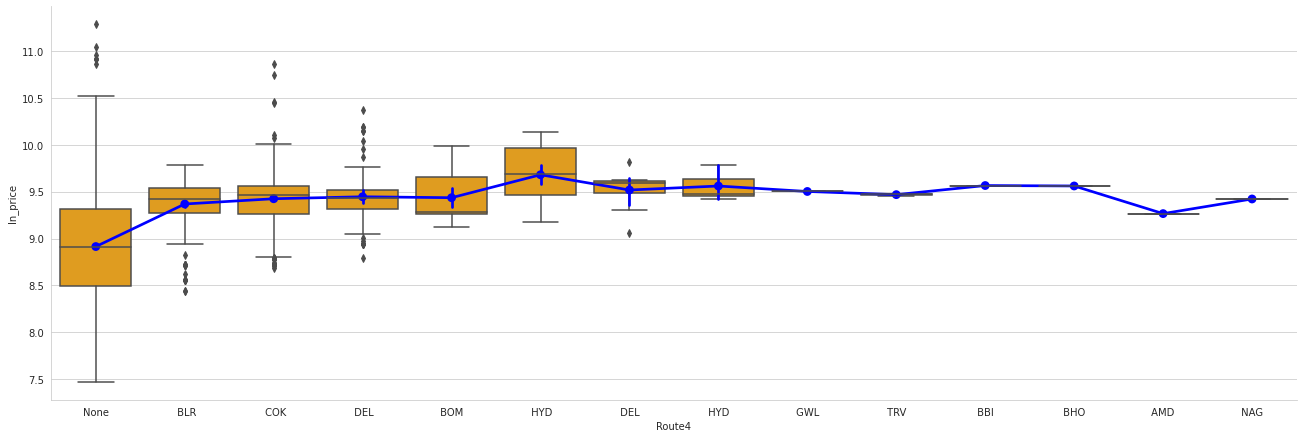

In [ ]:
sns.catplot(x='Route4',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='orange')
sns.pointplot(x='Route4',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='b')
plt.show()

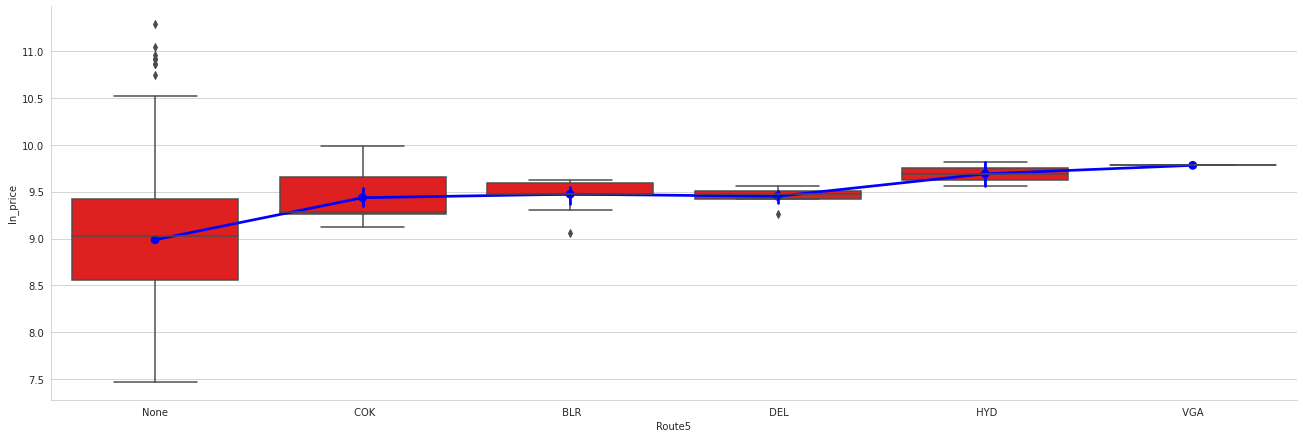

In [ ]:
sns.catplot(x='Route5',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='r')
sns.pointplot(x='Route5',y='ln_price', data=df,kind='box',height=6,aspect= 3,color='b')
plt.show()

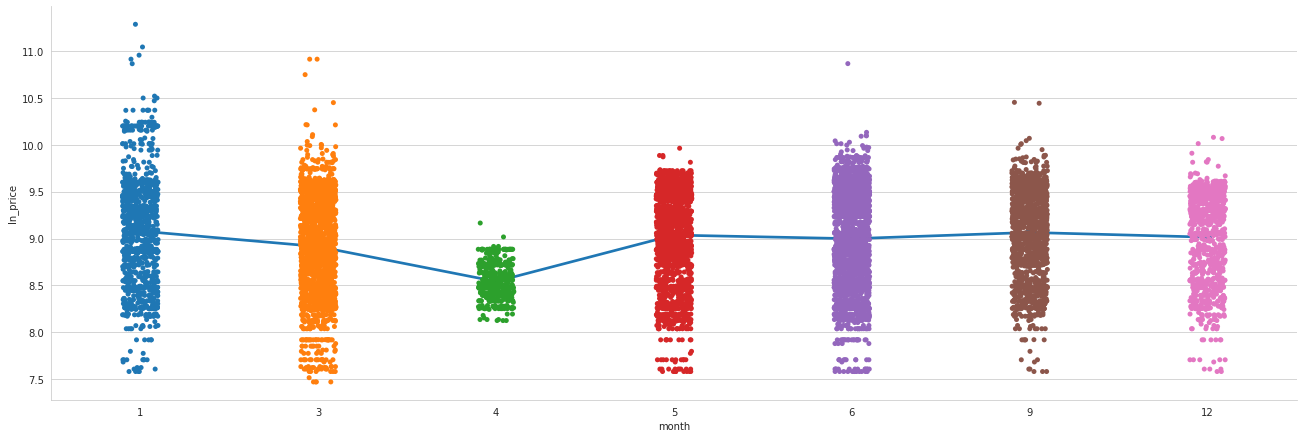

In [ ]:
df['month']=df['Date_of_Journey'].dt.month
sns.catplot(x='month',y='ln_price',height=6,aspect= 3,data=df)
sns.pointplot(x='month',y='ln_price',height=6,aspect= 3,data=df) 

small  variance 

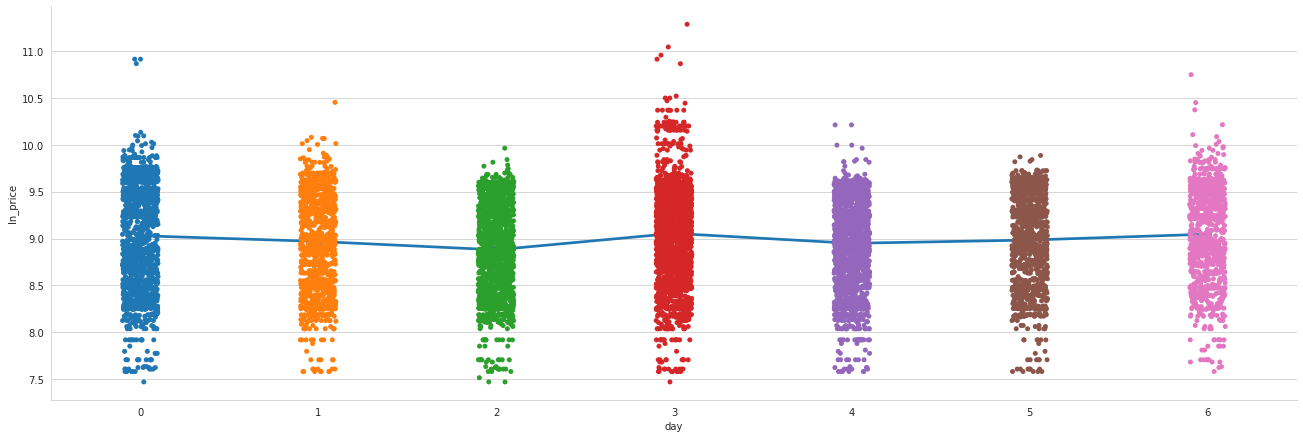

In [ ]:
df['day']=df['Date_of_Journey'].dt.weekday
sns.catplot(x='day',y='ln_price',height=6,aspect= 3,data=df)
sns.pointplot(x='day',y='ln_price',height=6,aspect= 3,data=df) 

small  variance 

In [ ]:
df.drop(['month','day','Date_of_Journey'],axis=1,inplace=True)
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

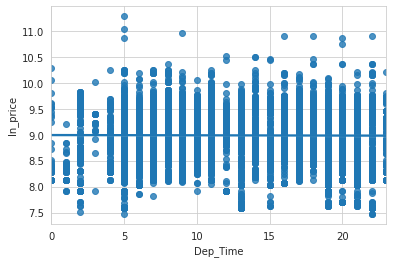

In [ ]:
sns.regplot(x='Dep_Time',y='ln_price',data=df)

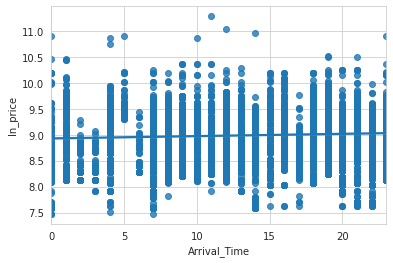

In [ ]:
sns.regplot(x='Arrival_Time',y='ln_price',data=df)

In [ ]:
df.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)
test_df.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [ ]:
h=df['Duration'].str.split('h').str[0]
m=df['Duration'].str.split('h').str[1].str.split('m').str[0].replace(' ','')

In [ ]:
ht=test_df['Duration'].str.split('h').str[0]
mt=test_df['Duration'].str.split('h').str[1].str.split('m').str[0].replace(' ','')

In [ ]:
for i in h.index:

  if len(h[i])==1:
    h[i]='0'+h[i]

for i in ht.index:

  if len(ht[i])==1:
    ht[i]='0'+ht[i]

In [ ]:
for i in df.index:
  try:
    if m[i] != '':
      df['Duration'][i]=h[i]+'.'+m[i].replace(' ','')
    else:
      df['Duration'][i]=h[i]+'.00'
  except:
    df['Duration'][i]='0.'+h[i].replace('m','')

for i in df.index:
  try:
    if m[i] != '':
      test_df['Duration'][i]=h[i]+'.'+m[i].replace(' ','')
    else:
      test_df['Duration'][i]=h[i]+'.00'
  except:
    test_df['Duration'][i]='0.'+h[i].replace('m','')

In [ ]:
df['Duration']=df['Duration'].astype('float')
test_df['Duration']=test_df['Duration'].astype('float')

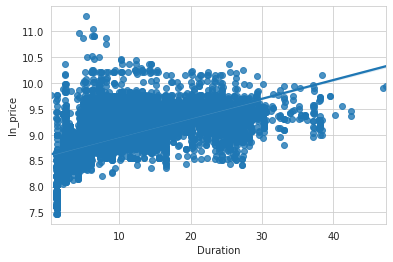

In [ ]:
sns.regplot(x='Duration',y='ln_price',data=df)

## Encoding

In [ ]:
test_df['Route3'].unique()

array([' COK', ' BLR', 'None', ' DEL', ' BOM ', ' COK ', ' MAA ', ' BBI ',
       ' AMD ', ' DEL ', ' NAG ', ' HYD', ' BHO ', ' VGA ', ' IXC ',
       ' IDR ', ' GOI ', ' HBX ', ' GAU ', ' UDR ', ' TIR ', ' VTZ ',
       ' TRV ', ' JDH ', ' HYD ', ' ISK ', ' IXR ', ' PNQ '], dtype=object)

In [ ]:
df['Route5'].unique()

array(['None', ' COK', ' BLR', ' DEL', ' HYD', ' VGA '], dtype=object)

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,ln_price
0,IndiGo,Banglore,New Delhi,2.50,0,No info,3897,BLR,DEL,None,None,None,8.267962
1,Air India,Kolkata,Banglore,7.25,2,No info,7662,CCU,IXR,BBI,BLR,None,8.944028
2,Jet Airways,Delhi,Cochin,19.00,2,No info,13882,DEL,LKO,BOM,COK,None,9.538348
3,IndiGo,Kolkata,Banglore,5.25,1,No info,6218,CCU,NAG,BLR,None,None,8.735204
4,IndiGo,Banglore,New Delhi,4.45,1,No info,13302,BLR,NAG,DEL,None,None,9.495670


In [ ]:
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,Delhi,Cochin,2.50,1,No info,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,7.25,1,No info,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,19.00,1,In-flight meal not included,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,5.25,1,No info,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,4.45,0,No info,BLR,DEL,None,None,None


In [ ]:
temp_df=pd.DataFrame()
temp=[]
test_temp=[]
test_temp_df=pd.DataFrame()
for i in df.drop(['Duration','Total_Stops','Price','ln_price','Route1','Route2','Route3','Route4','Route5'],axis=1).columns:
  k=0
  for j in df[i].unique():
    k=k+1
    temp=df[i].map({j:1}).fillna(0)
    test_temp=test_df[i].map({j:1}).fillna(0)
    temp_df1=pd.concat([temp_df,pd.DataFrame(temp,columns=[str(i)+'_'+str(j)])],axis=1)
    temp_df1=pd.concat([temp_df,pd.DataFrame(temp)],axis=1)
    test_temp_df1=pd.concat([test_temp_df,pd.DataFrame(test_temp,columns=[str(i)+'_'+str(j)])],axis=1)

In [ ]:
temp_df

""


In [ ]:
def one_hot_enc(df,test_df):
  temp_df=pd.DataFrame()
  temp=[]
  test_temp=[]
  col=[]
  test_temp_df=pd.DataFrame()
  for i in df.columns:
    k=0
    for j in df[i].unique():
      k=k+1
      temp=df[i].map({j:1}).fillna(0)
      test_temp=test_df[i].map({j:1}).fillna(0)
      col.append(str(i)+'_'+str(j))
      temp_df=pd.concat([temp_df,pd.DataFrame(temp)],axis=1)
      test_temp_df=pd.concat([test_temp_df,pd.DataFrame(test_temp)],axis=1)
  temp_df.columns=col
  test_temp_df.columns=col
  return(temp_df,test_temp_df)

In [ ]:
ohe,test_ohe=one_hot_enc(df.drop(['Duration','Total_Stops','Price','ln_price','Route1','Route2','Route3','Route4','Route5'],axis=1),test_df.drop(['Duration','Total_Stops','Route1','Route2','Route3','Route4','Route5'],axis=1))

In [ ]:
# ordinal(rank) accordind to fees
for j in ['Route1','Route2','Route3','Route4','Route5']: 
  labels=df.groupby(j)['ln_price'].mean().sort_values().index
  k=0
  for i in list(labels):
    k=k+1
    df[j].loc[df[j]==i]=k
    if i in list(test_df[j].unique()):
      test_df[j]=test_df[j].replace(list(test_df[j].loc[test_df[j]==i]),k)
  df[j]=df[j].astype('float')
  try:
   test_df[j]=test_df[j].astype('float')
  except:
    m=[]
    for l in test_df[j]:
      try:
        m.append(float(l))
      except:
        m.append(df['ln_price'].mean())
    test_df[j]=m
    print('some value in '+str(j))

some value in Route3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Duration         10682 non-null  float64
 4   Total_Stops      10682 non-null  int64  
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Route1           10682 non-null  float64
 8   Route2           10682 non-null  float64
 9   Route3           10682 non-null  float64
 10  Route4           10682 non-null  float64
 11  Route5           10682 non-null  float64
 12  ln_price         10682 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in ['Duration','Price']:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=['Duration','Price'])


In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

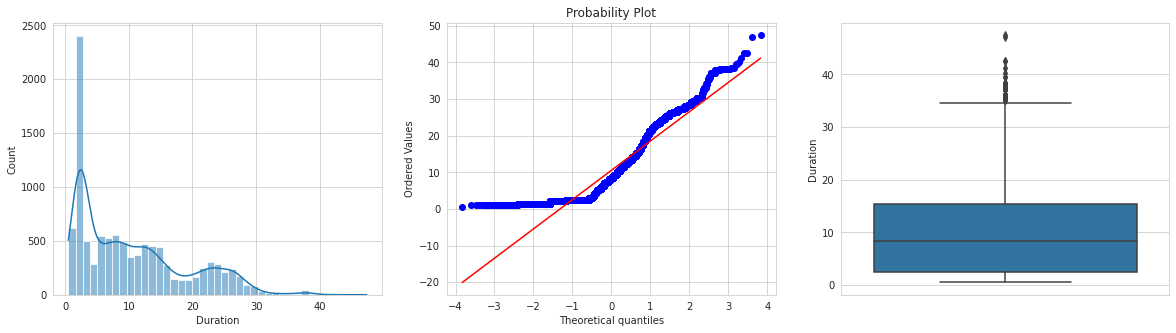

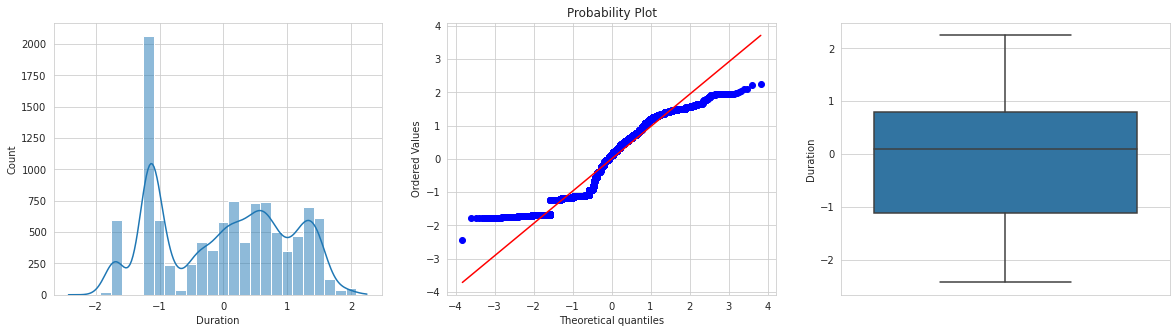

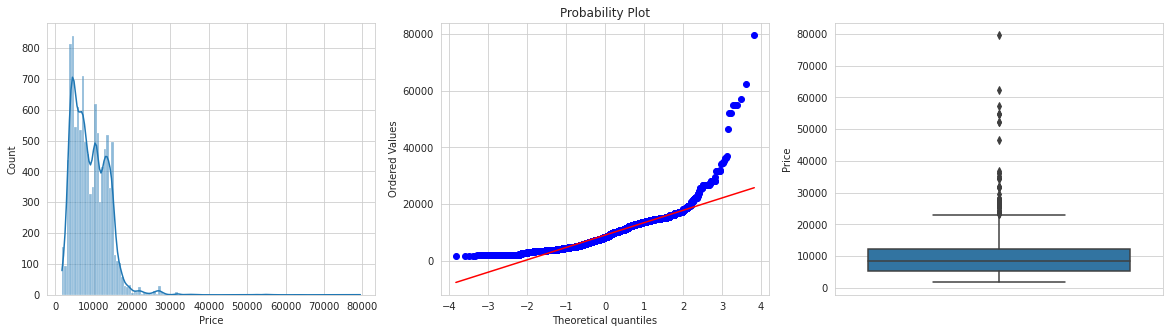

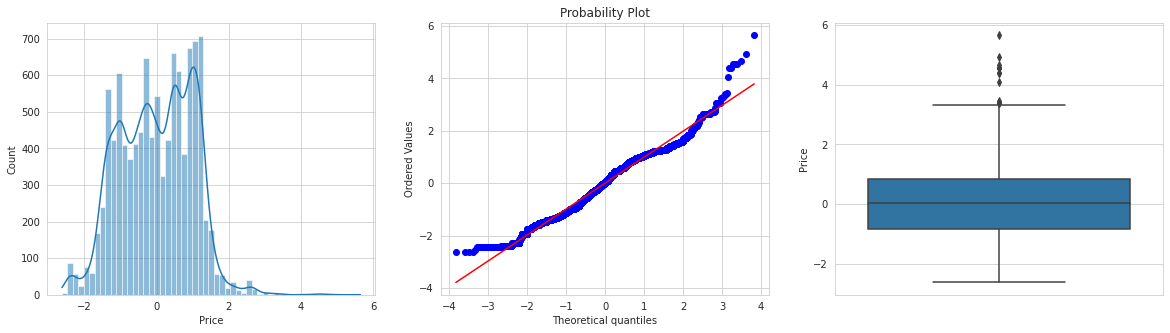

In [ ]:
import scipy.stats as stat
import pylab 
for i in ['Duration','Price']:
  pplot(df,i)
  pplot(pt1,i)

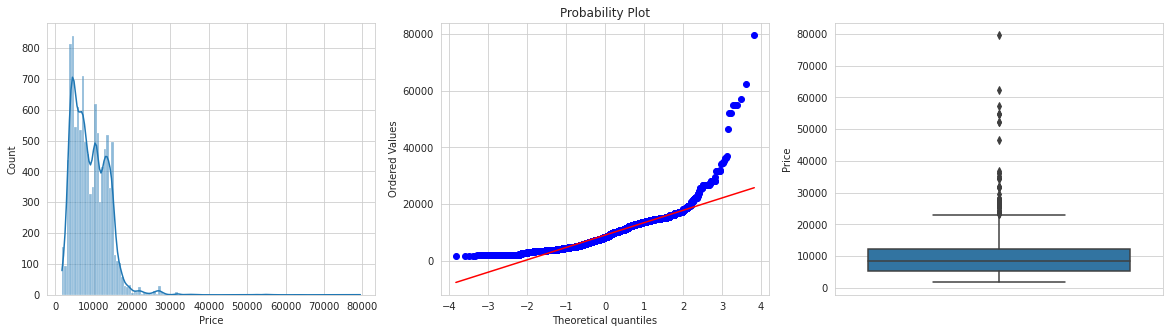

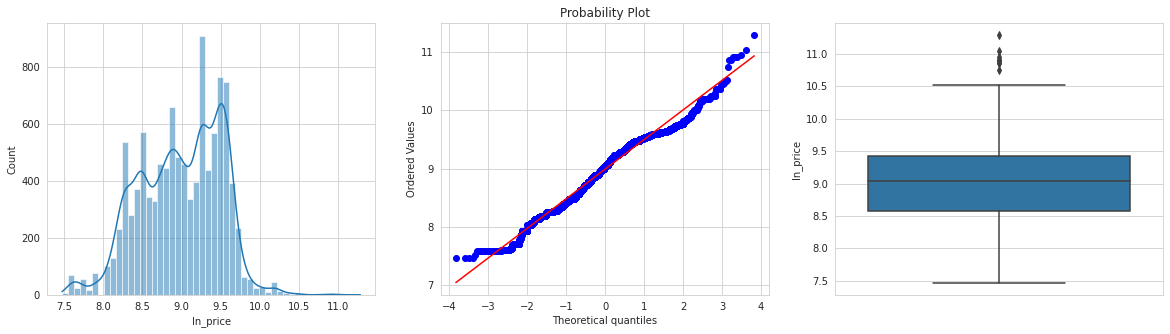

In [ ]:
pplot(df,'Price')
pplot(df,'ln_price')

after transformation price and duration are almost normaly distributed  and outlier has been minimized 

In [ ]:
from sklearn.preprocessing import power_transform as PT
test_pt=pd.DataFrame()
for i in ['Duration']:
  if test_df[i].min()<=0:
    test_pt1=(test_df[i]-test_df[i].min()+0.0001)
  else:
    test_pt1=test_df[i]
  test_pt=pd.concat([test_pt,pd.DataFrame(test_pt1)],axis=1)

test_pt1=PT(test_pt)
test_pt1=pd.DataFrame(test_pt1,columns=['Duration'])

In [ ]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,ln_price
0,IndiGo,Banglore,New Delhi,2.50,0,No info,3897,3.0,5.0,1.0,1.0,1.0,8.267962
1,Air India,Kolkata,Banglore,7.25,2,No info,7662,4.0,20.0,4.0,3.0,1.0,8.944028
2,Jet Airways,Delhi,Cochin,19.00,2,No info,13882,5.0,23.0,18.0,5.0,1.0,9.538348
3,IndiGo,Kolkata,Banglore,5.25,1,No info,6218,4.0,28.0,7.0,1.0,1.0,8.735204
4,IndiGo,Banglore,New Delhi,4.45,1,No info,13302,3.0,28.0,15.0,1.0,1.0,9.495670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2.30,0,No info,4107,4.0,4.0,1.0,1.0,1.0,8.320448
10679,Air India,Kolkata,Banglore,2.35,0,No info,4145,4.0,4.0,1.0,1.0,1.0,8.329658
10680,Jet Airways,Banglore,Delhi,3.00,0,No info,7229,3.0,5.0,1.0,1.0,1.0,8.885856
10681,Vistara,Banglore,New Delhi,2.40,0,No info,12648,3.0,5.0,1.0,1.0,1.0,9.445254


In [ ]:
pt1=pd.concat([df[['Total_Stops','Route1','Route2','Route3','Route4','Route5','ln_price']],pt1[['Duration']],ohe],axis=1)

In [ ]:
test_pt1=pd.concat([test_df[['Total_Stops','Route1','Route2','Route3','Route4','Route5']],test_pt1[['Duration']],test_ohe],axis=1)

In [ ]:
pt1=pt1.dropna()

In [ ]:
x=pt1.drop('ln_price',axis=1)
y=pt1['ln_price']

In [ ]:
'''for i in x.columns:
  if i in test_pt1.columns:
    k=0
  else:
    test_pt1[i]=0'''

'for i in x.columns:\n  if i in test_pt1.columns:\n    k=0\n  else:\n    test_pt1[i]=0'

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)
pt1["Cluster"] = kmeans.predict(x)
test_pt1["Cluster"] = kmeans.predict(test_pt1)
pt1["Cluster"] = pt1["Cluster"].astype("float")
test_pt1["Cluster"] = test_pt1["Cluster"].astype("float")

pt1.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,ln_price,Duration,Airline_IndiGo,Airline_Air India,Airline_Jet Airways,Airline_SpiceJet,Airline_Multiple carriers,Airline_GoAir,Airline_Vistara,Airline_Air Asia,Airline_Vistara Premium economy,Airline_Jet Airways Business,Airline_Multiple carriers Premium economy,Airline_Trujet,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Delhi,Destination_Hyderabad,Additional_Info_No info,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_1 Short layover,Additional_Info_No Info,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_Business class,Additional_Info_Red-eye flight,Additional_Info_2 Long layover,Cluster
0,0.0,3.0,5.0,1.0,1.0,1.0,8.267962,-1.107066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,4.0,20.0,4.0,3.0,1.0,8.944028,-0.052944,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2.0,5.0,23.0,18.0,5.0,1.0,9.538348,1.049254,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,28.0,7.0,1.0,1.0,8.735204,-0.389587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1.0,3.0,28.0,15.0,1.0,1.0,9.495670,-0.556103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x=pt1.drop('ln_price',axis=1)
y=pt1['ln_price']

In [ ]:
x.Cluster

0        1.0
1        2.0
2        0.0
3        2.0
4        0.0
        ... 
10677    1.0
10678    1.0
10679    1.0
10680    1.0
10681    1.0
Name: Cluster, Length: 10681, dtype: float64

## **Correlation**

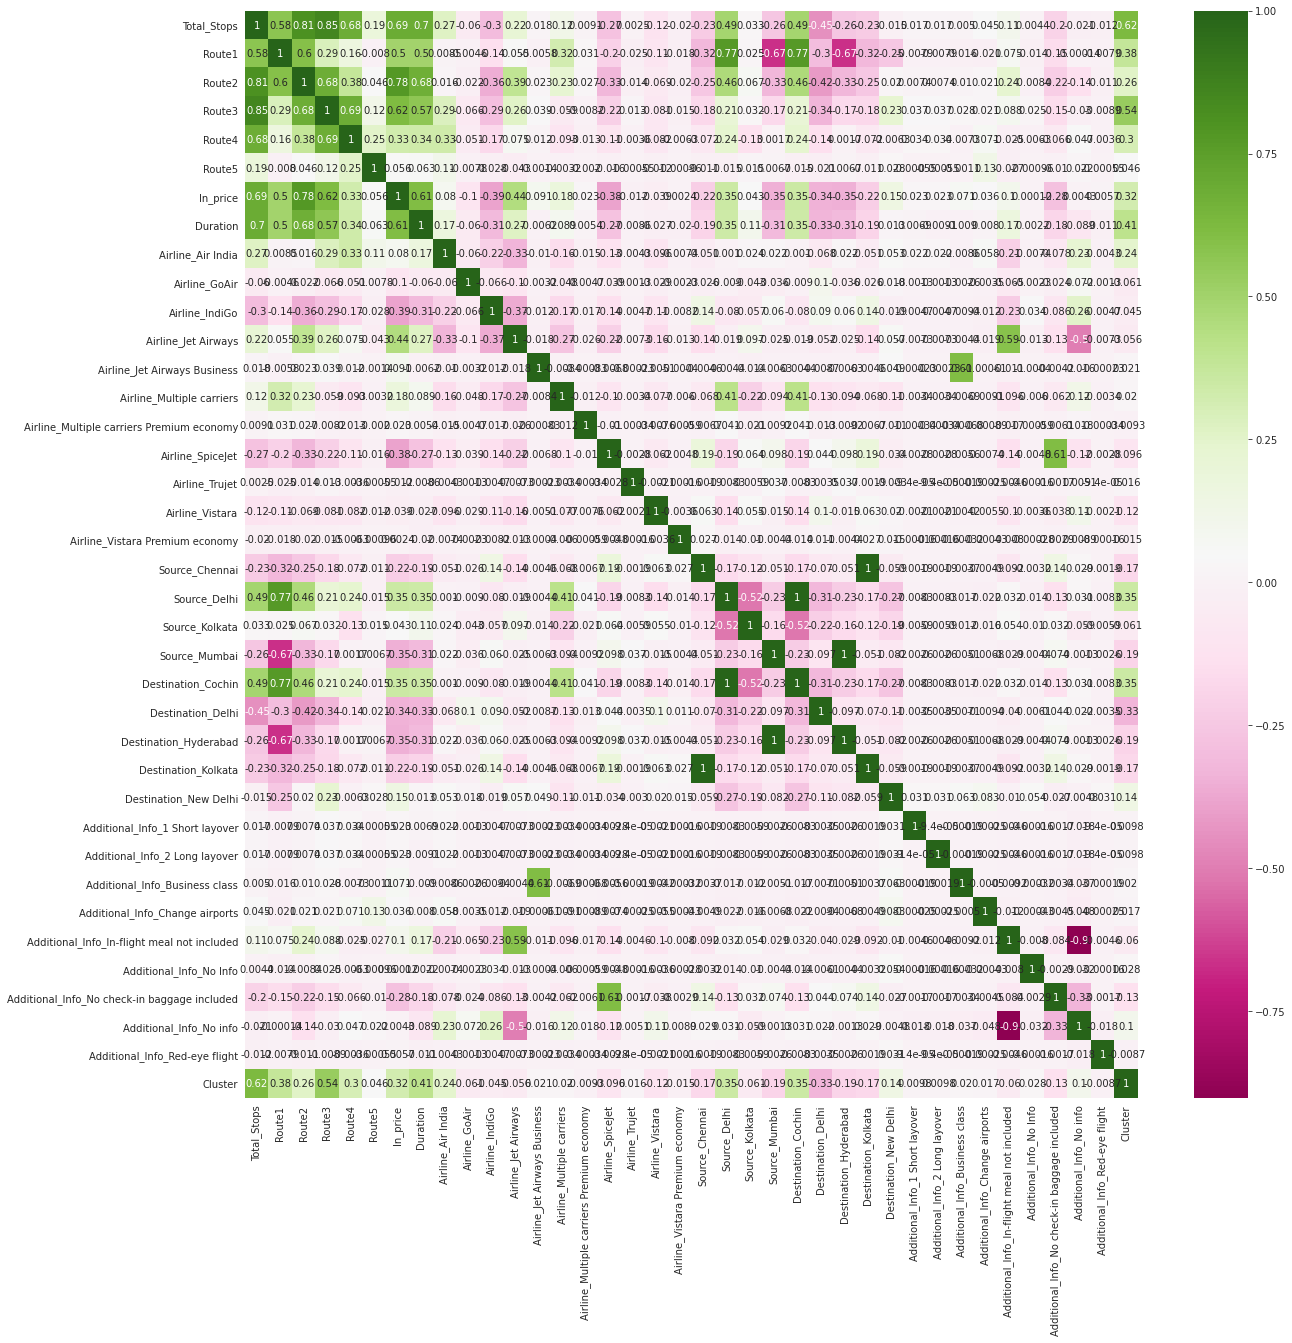

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(pt1.corr(),cmap='PiYG',annot=True)

ln_fees has no corilation with rating and Experience

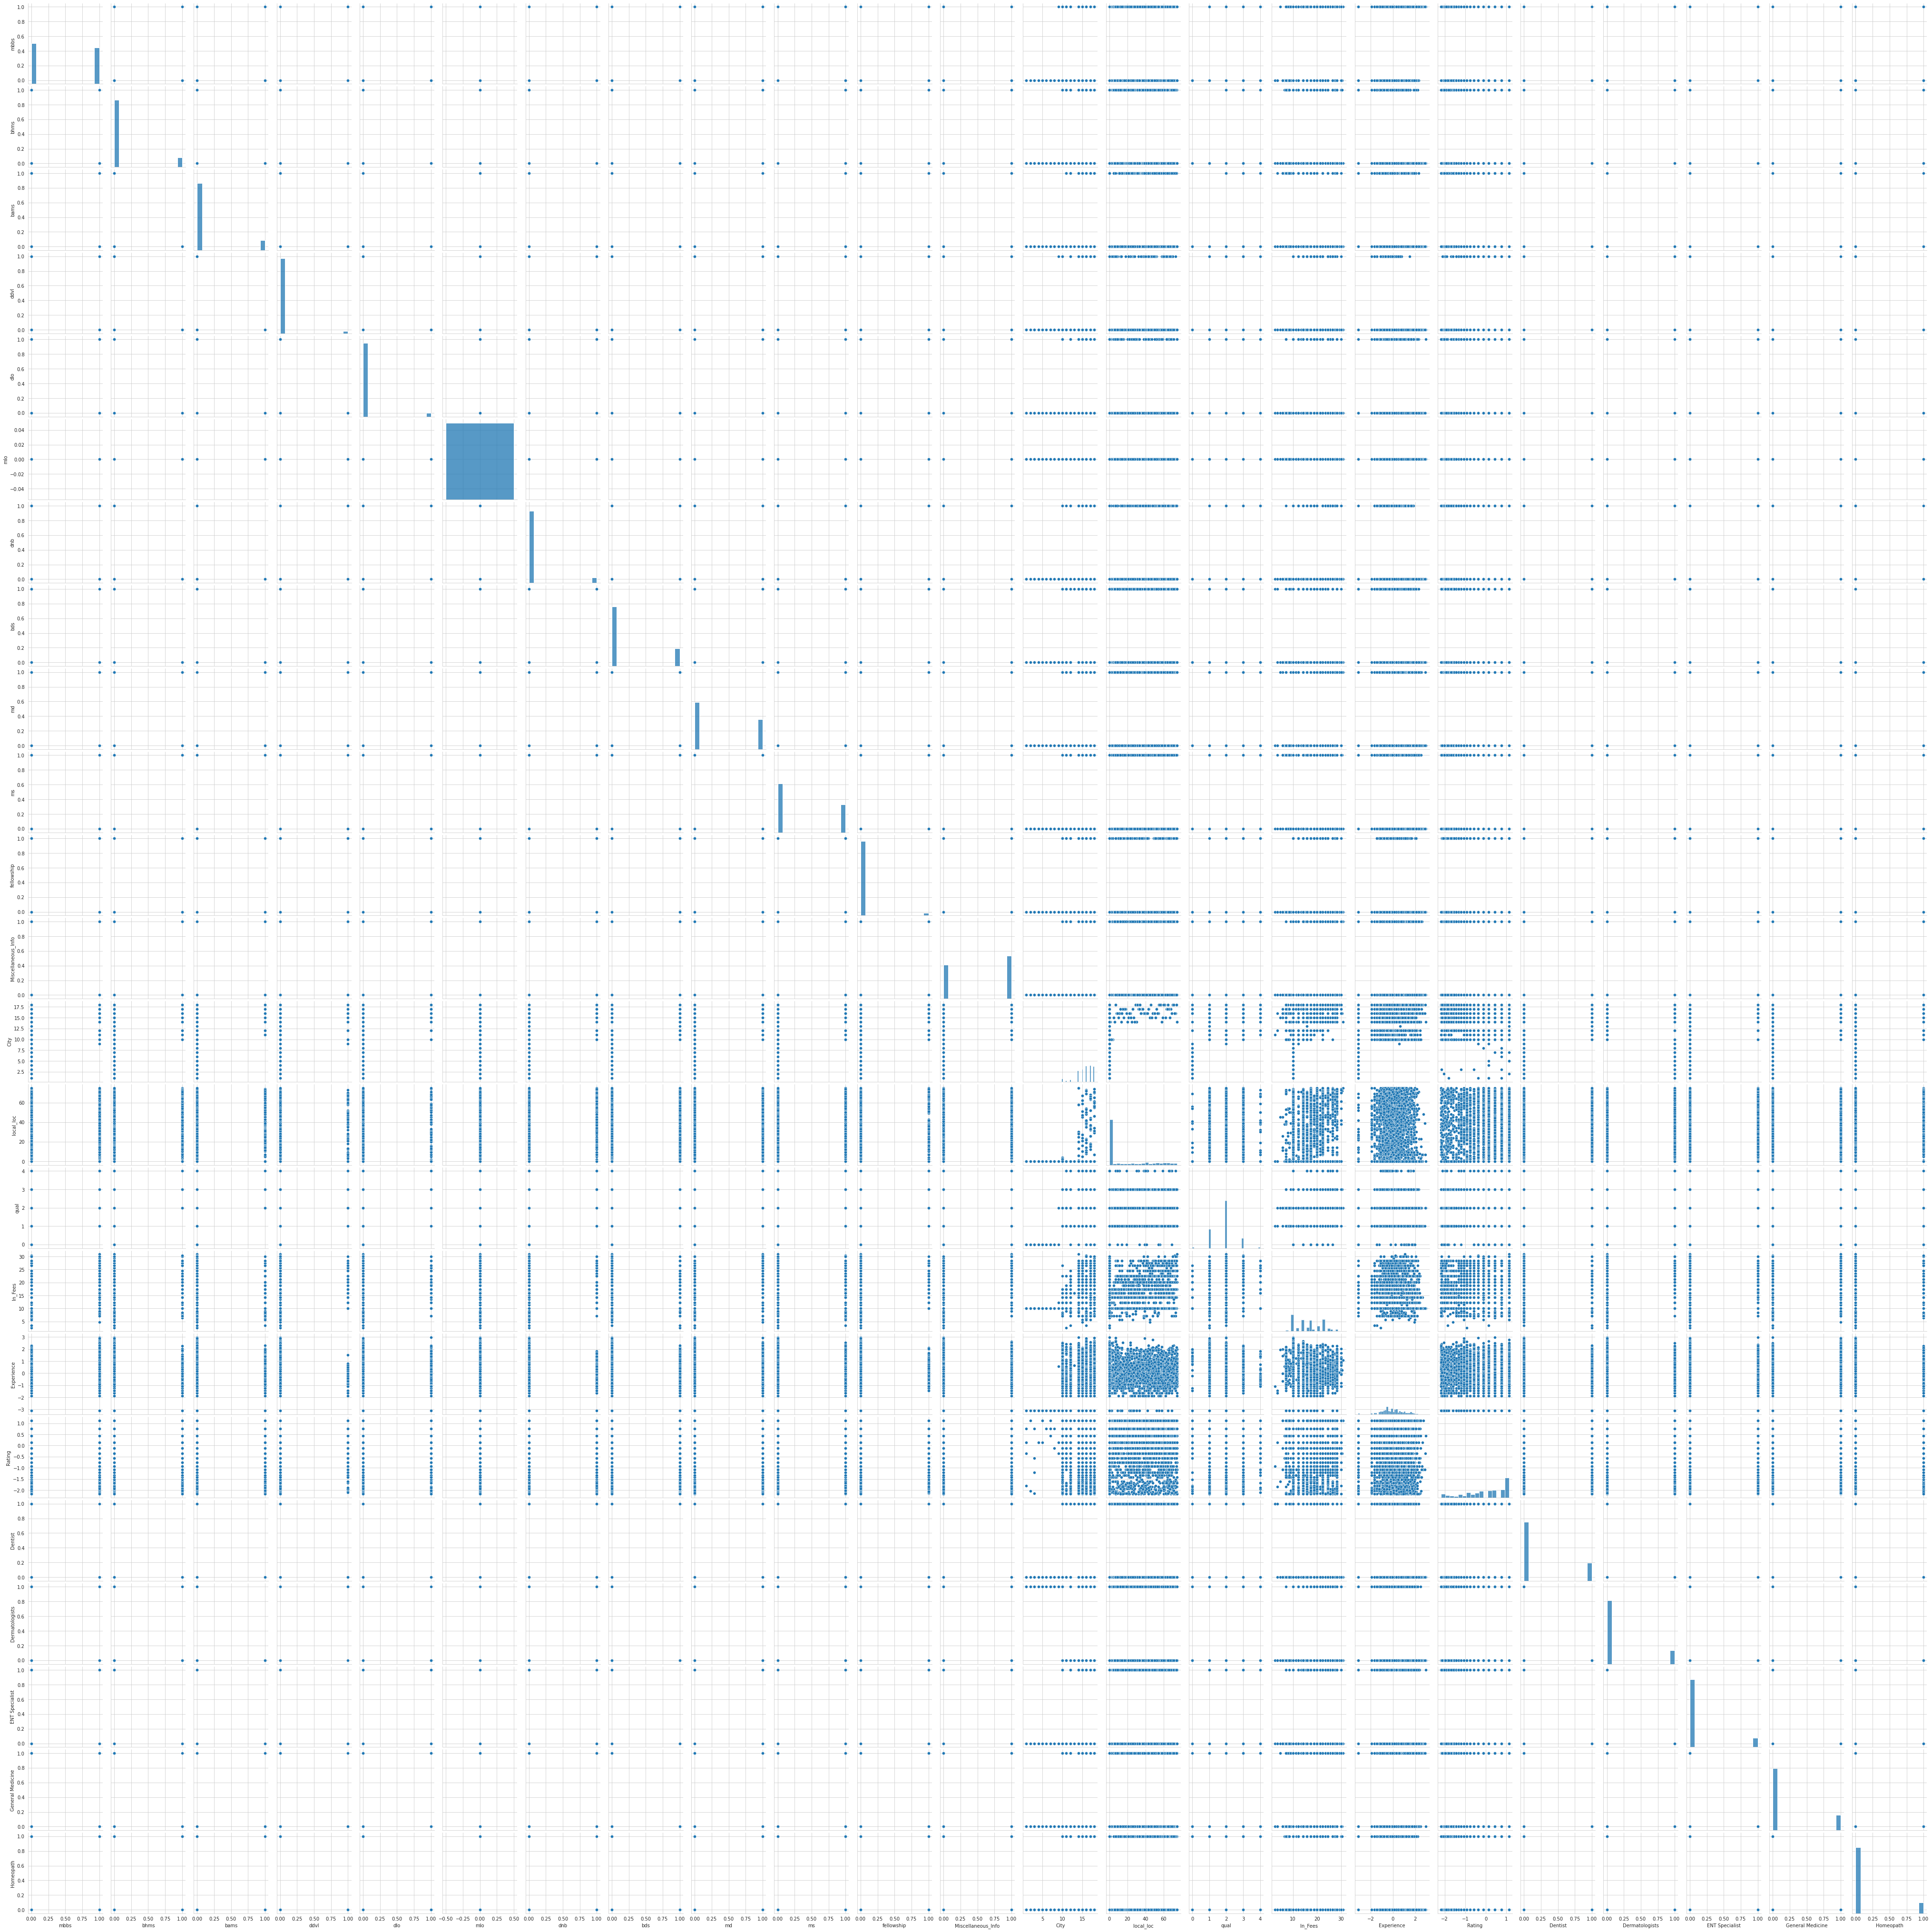

In [ ]:
sns.pairplot(pt1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif as anova
s = SelectKBest(anova, k=10)
s.fit(x,y)
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

,0,1
Duration,10.197476,0.0
Route5,13.160239,0.0
Airline_SpiceJet,34.087524,0.0
Airline_GoAir,39.516516,0.0
Airline_IndiGo,50.282557,0.0
Destination_New Delhi,60.890082,0.0
Additional_Info_Change airports,61.242460,0.0
Cluster,84.455725,0.0
Additional_Info_No info,93.179973,0.0
Destination_Delhi,98.154916,0.0


## **Separating dependent and independent variables**

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10681
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10681 non-null  float64
 1   Route1                                        10681 non-null  float64
 2   Route2                                        10681 non-null  float64
 3   Route3                                        10681 non-null  float64
 4   Route4                                        10681 non-null  float64
 5   Route5                                        10681 non-null  float64
 6   Duration                                      10681 non-null  float64
 7   Airline_Air India                             10681 non-null  float64
 8   Airline_GoAir                                 10681 non-null  float64
 9   Airline_IndiGo                                10681 non-null 

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=42)
X_test=test_pt1

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

## Removing outlier from dataset

In [ ]:
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[['Duration','ln_price']]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('ln_price',axis=1)
  y_z=df_z.ln_price
  return(x_z,y_z)

In [ ]:
x_train,y_train=z_outlier(x_train,y_train)

Percent of data retained = 0.9991974317817014


In [ ]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

## **Linear Regression**



In [ ]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train,y_train)
y_pred=reg_lr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
lr_e=r2_score(y_test,y_pred)

0.7788997015511852
0.1833126885408056


In [ ]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(normalize=True), x, y, cv=3,scoring='r2')

lr_reg=cv_results['test_score'].mean()

In [ ]:
lr_reg

## **Ridge**

In [ ]:
from sklearn.linear_model import Ridge
reg_lr = Ridge().fit(X=x_train_scaler,y=y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
ridge_e=r2_score(y_test,y_pred)

In [ ]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(), ss.transform(x), y, cv=3)

rid_reg=cv_results['test_score'].mean()

In [ ]:
rid_reg

## **Random Forest Regressor**


In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
rfr_e=r2_score(y_test,y_pred)

In [ ]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=3)

rfc_score=cv_results['test_score']


In [ ]:
rfc_reg=rfc_score.mean()

In [ ]:
rfc_reg

## **XGB Regressor**

In [ ]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
xgb_e=r2_score(y_test,y_pred)

In [ ]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=3)

xgr_score=cv_results['test_score'].mean()




In [ ]:
xgr_score

## **Extra Tree Regressor**

In [ ]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
etr_e=r2_score(y_test,y_pred)

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=3)

etc_score=cv_results['test_score'].mean()


In [ ]:
etc_score

## **Support vector Regressor**

In [ ]:
from sklearn.svm import SVR

svc = SVR()
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
svm_e=r2_score(y_test,y_pred)

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(kernel='linear'), ss.transform(x), y, cv=3)

svc_score=cv_results['test_score'].mean()


In [ ]:
svc_score

## **Comparing models**

In [ ]:
score=[lr_reg,rid_reg,rfc_reg,xgr_score,etc_score,svc_score]
error=[lr_e,ridge_e,rfr_e,xgb_e,etr_e,svm_e]
name=['LR','Ridge','RFC','XGB','ETC','SVC']
diff=[]
for i in range(6):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

,0,1,2,3
0,LR,-1.18658e+23,0.7789,-1.18658e+23
1,Ridge,0.772995,0.779441,-0.0064459
2,RFC,0.766934,0.810465,-0.0435315
3,XGB,0.774873,0.81184,-0.0369663
4,ETC,0.740092,0.790374,-0.0502814
5,SVC,0.766636,0.810692,-0.0440568


XGB can be selected for Hyperparameter 

# **Hyper-parameter tuning** 

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xg_grid = GridSearchCV(XBR(n_jobs=-1), params, n_jobs=-1, cv=3)
xg_grid.fit(x_train, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

[03:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: 0.8188190011536958
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
Best score: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1), x_train,y_train, cv=10)

cv_results['test_score'].mean()

[06:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.8218321794784254

# **Best Model Evaluation**

In [ ]:
model=XBR(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(x,y)

[06:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))

0.8407821958435642
0.04200249463637231


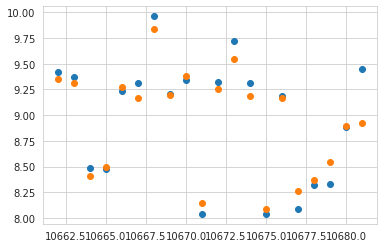

In [ ]:
plt.scatter(x=y.index[-20:],y=y[-20:],cmap='blue')
plt.scatter(x=y.index[-20:],y=y_pred[-20:],cmap='red')


(array([3.000e+00, 6.000e+00, 2.000e+01, 1.500e+01, 1.580e+02, 7.260e+02,
        4.057e+03, 4.810e+03, 8.020e+02, 8.400e+01]),
 array([-1.76626501e+00, -1.51381125e+00, -1.26135749e+00, -1.00890374e+00,
        -7.56449978e-01, -5.03996220e-01, -2.51542463e-01,  9.11295291e-04,
         2.53365053e-01,  5.05818811e-01,  7.58272569e-01]),
 <a list of 10 Patch objects>)

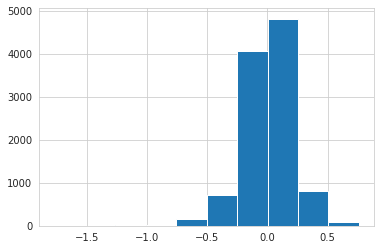

In [ ]:
plt.hist((y_pred-y))

#**Generating result for y test**

In [ ]:
for i in x.columns:
  if i in test_pt1.columns:
    k=0
  else:
    print(i)

In [ ]:
x.shape

(10681, 41)

In [ ]:
y_prediction=model.predict(test_pt1)

In [ ]:
Y_test=np.exp(y_prediction)#reverse log transform for the prediction

In [ ]:
pd.DataFrame(Y_test).to_csv('prdicted_value.csv')# saving result in csv formate

# **Saving the model** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

filename = '/content/drive/MyDrive/datatrained/Flight_pred/model.sav'
pickle.dump(model, open(filename, 'wb'))

# **Conclusion**

In [ ]:

filename = '/content/drive/MyDrive/datatrained/Flight_pred/model.sav'
model = pickle.load(open(filename, 'rb'))

[06:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = model.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.8407821958435642
0.04200249463637231


In [ ]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10642,10643,10644,10645,10646,10647,10648,10649,10650,10651,10652,10653,10654,10655,10656,10657,10658,10659,10660,10661,10662,10663,10664,10665,10666,10667,10668,10669,10670,10671,10672,10673,10674,10675,10676,10677,10678,10679,10680,10681
0,8.784926,9.003840,9.580112,8.772998,9.085264,8.318331,9.186177,9.769204,9.200168,9.246765,9.006265,8.455938,8.550385,9.195254,8.455938,9.281909,8.666190,9.257070,9.474337,9.265697,8.956384,9.050485,8.386297,8.430654,9.204106,9.552765,8.883827,8.728498,8.508210,8.487202,8.487202,9.491712,8.386297,9.253162,9.261267,8.949154,8.570455,8.572498,9.830638,9.639922,...,9.210973,9.210973,9.229104,9.400805,8.744270,9.473611,8.472126,9.190844,9.254997,9.037712,9.526890,8.294249,8.734682,8.539456,9.188292,8.533201,8.532310,8.975801,9.203588,9.349556,9.308518,8.412042,8.491972,9.270889,9.168497,9.841776,9.198812,9.386016,8.147222,9.256904,9.547639,9.189202,8.086040,9.165510,8.266088,8.370468,8.544859,8.893559,8.919258,NaN
ln_price,8.267962,8.944028,9.538348,8.735204,9.495670,8.261785,9.313529,10.010996,9.313529,9.062420,9.094593,8.336630,8.448272,9.176059,8.477204,9.547598,8.670772,9.236203,9.501591,9.464828,9.877913,8.847216,8.279697,8.481151,8.956351,9.494918,9.016513,8.946635,8.448486,8.212568,8.212568,9.490015,8.394573,9.298260,9.423272,8.681690,8.444407,8.739536,9.863967,9.610726,...,9.325631,8.945072,9.294406,9.744316,9.350711,8.404248,9.532496,8.471777,9.424161,9.275941,9.189117,9.574150,8.370779,8.644354,8.632841,9.176059,8.660254,8.448486,8.492491,9.032648,9.421573,9.370161,8.481151,8.477204,9.236203,9.313529,9.962652,9.203215,9.342333,8.039157,9.319195,9.723403,9.313529,8.039157,9.189525,8.088562,8.320448,8.329658,8.885856,9.445254
